In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Only importing Adj Close
WFC_DF = yf.download('WFC', start = '2003-01-19',end='2023-01-19')['Adj Close']
BAC_DF = yf.download('BAC', start = '2003-01-19',end='2023-01-19')['Adj Close']
JPM_DF = yf.download('JPM', start = '2003-01-19',end='2023-01-19')['Adj Close']
C_DF = yf.download('C', start = '2003-01-19',end='2023-01-19')['Adj Close']

# Combining the data frames by columns. 
Banks = pd.concat([WFC_DF,BAC_DF,JPM_DF,C_DF], axis = 1)
# axis = 1 for columns, 0 is the default.

# Adding titles to the columns.
Banks.columns = ['WFC','BAC','JPM','C']

# Getting all columns in the dataframe ready to be used for the daily return.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Difference between logs and regular daily returns.

# Calculating daily percent returns 
print(Banks.pct_change(1))

# Calculating daily log returns
log_rets = np.log(Banks/ Banks.shift(1)) 

# How to solve logs:
# https://www.youtube.com/watch?v=mQTWzLpCcW0
# Daily returns is equal to (Closing price - opening price) * Stocks owned in the company

                 WFC       BAC       JPM         C
Date                                              
2003-01-21       NaN       NaN       NaN       NaN
2003-01-22 -0.001910  0.002403 -0.028324 -0.006641
2003-01-23  0.014884  0.009873  0.017409  0.034540
2003-01-24 -0.014247 -0.027653 -0.052527 -0.036348
2003-01-27 -0.006376 -0.014364 -0.021840 -0.019559
...              ...       ...       ...       ...
2023-01-11  0.008971  0.007620  0.007431  0.010791
2023-01-12  0.002106  0.002618 -0.001003  0.007801
2023-01-13  0.032454  0.022048  0.025235  0.016908
2023-01-17 -0.002262 -0.020153 -0.015453  0.007813
2023-01-18 -0.016772 -0.023175 -0.030043 -0.017492

[5034 rows x 4 columns]


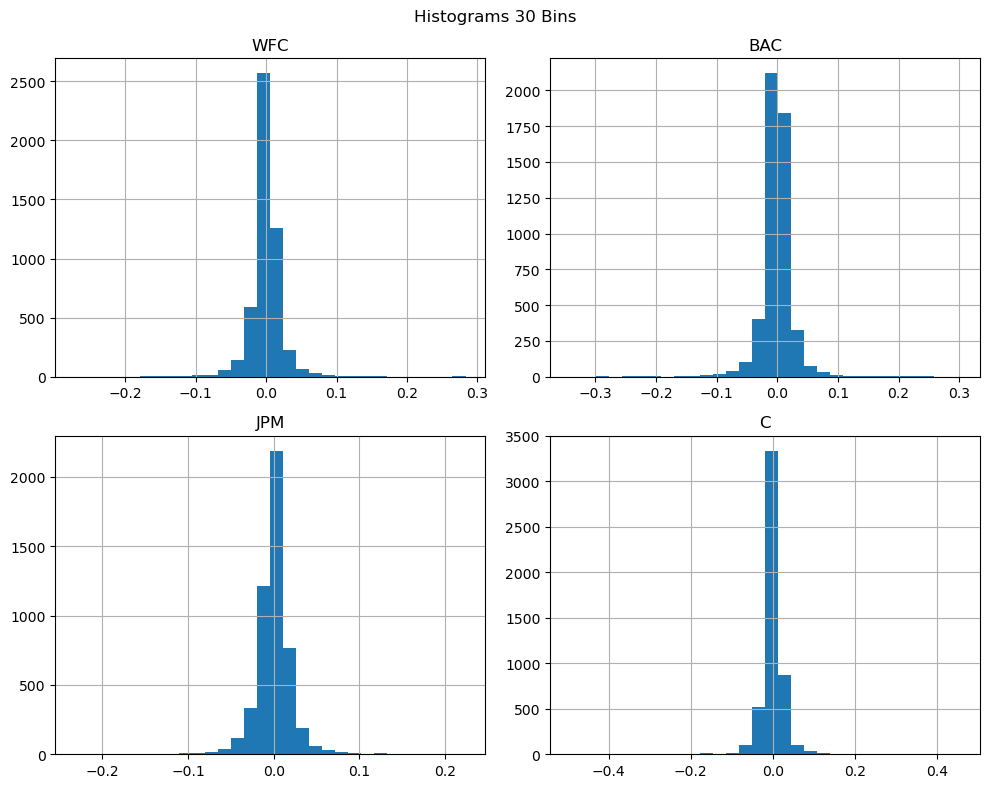

In [5]:
# Normally Distributed

log_rets.hist(bins=30,figsize=(10,8))
plt.suptitle("Histograms 30 Bins")
plt.tight_layout()
plt.savefig('Histogram.jpg')

In [8]:
# Generating 4 random numbers when summed equal to 100%
def gen_weights(N = 4):
    global weights
    weights = np.random.random(N)
    return weights/np.sum(weights)

n = '\n' # newline for the f string
print(f'Four randomly generated numbers for each column:{n}{gen_weights()}')

# Calculating Annual log returns
def calculate_annual_returns(weights = gen_weights(), log_rets = log_rets):
    return np.sum(log_rets.mean()*weights) * 252

print(f'{n}Log annual returns are equal to: {n}{calculate_annual_returns()}')
print(f'{n}Log mean for each column in the dataframe (static):{n}{log_rets.mean()}')

# Annual Volatility using Covariance
def portfolio_v(weights = gen_weights(),log_rets = log_rets):
    portfolio_vol = np.sqrt(np.dot(weights,np.dot(log_rets.cov()*252,weights)))
    return portfolio_vol
# https://stackoverflow.com/questions/47479225/calculating-portfolio-variance-and-volatility-in-python
# More information on the np.dot function: https://numpy.org/doc/stable/reference/generated/numpy.dot.html
# More information on the np.cov function: https://numpy.org/doc/stable/reference/generated/numpy.cov.html

'''''
# Orgional plan for volatility.
def calculate_volatility(weights = gen_weights(),log_rets_cov = log_rets.cov):
    annualized_cov = np.dot(log_rets_cov * 252,weights) # Using cross multiplication to get the annual version of covariance.
    vol = np.dot(weights,annualized_cov)
    return np.sqrt(vol)
# This caused a type error when doing the cross mutiplication on np.dot(log_rets_cov * 252,weights).
'''''
print(f'{n}Portfollio volatility using covariance: {n}{portfolio_v()}')

Four randomly generated numbers for each column:
[0.17982451 0.31873478 0.32720819 0.17423252]

Log annual returns are equal to: 
0.02319990307101867

Log mean for each column in the dataframe (static):
WFC    0.000233
BAC    0.000084
JPM    0.000446
C     -0.000310
dtype: float64

Portfollio volatility using covariance: 
0.3879505631076585


In [9]:
# Keeping track of all the information.

list_portfolio_returns = []
list_portfolio_vol = []
list_weights = [] 

# Getting 6000 random results using different weights.
x = 0
while x <= 6000:
    x += 1
    weights = gen_weights() 
    list_weights.append(weights)
    list_portfolio_returns.append(calculate_annual_returns(weights))
    list_portfolio_vol.append(portfolio_v(weights))
mc_sharpe_ratios = np.array(list_portfolio_returns)/np.array(list_portfolio_vol)

# weights has to be an argument here to ensure values stay consistent between the functions.

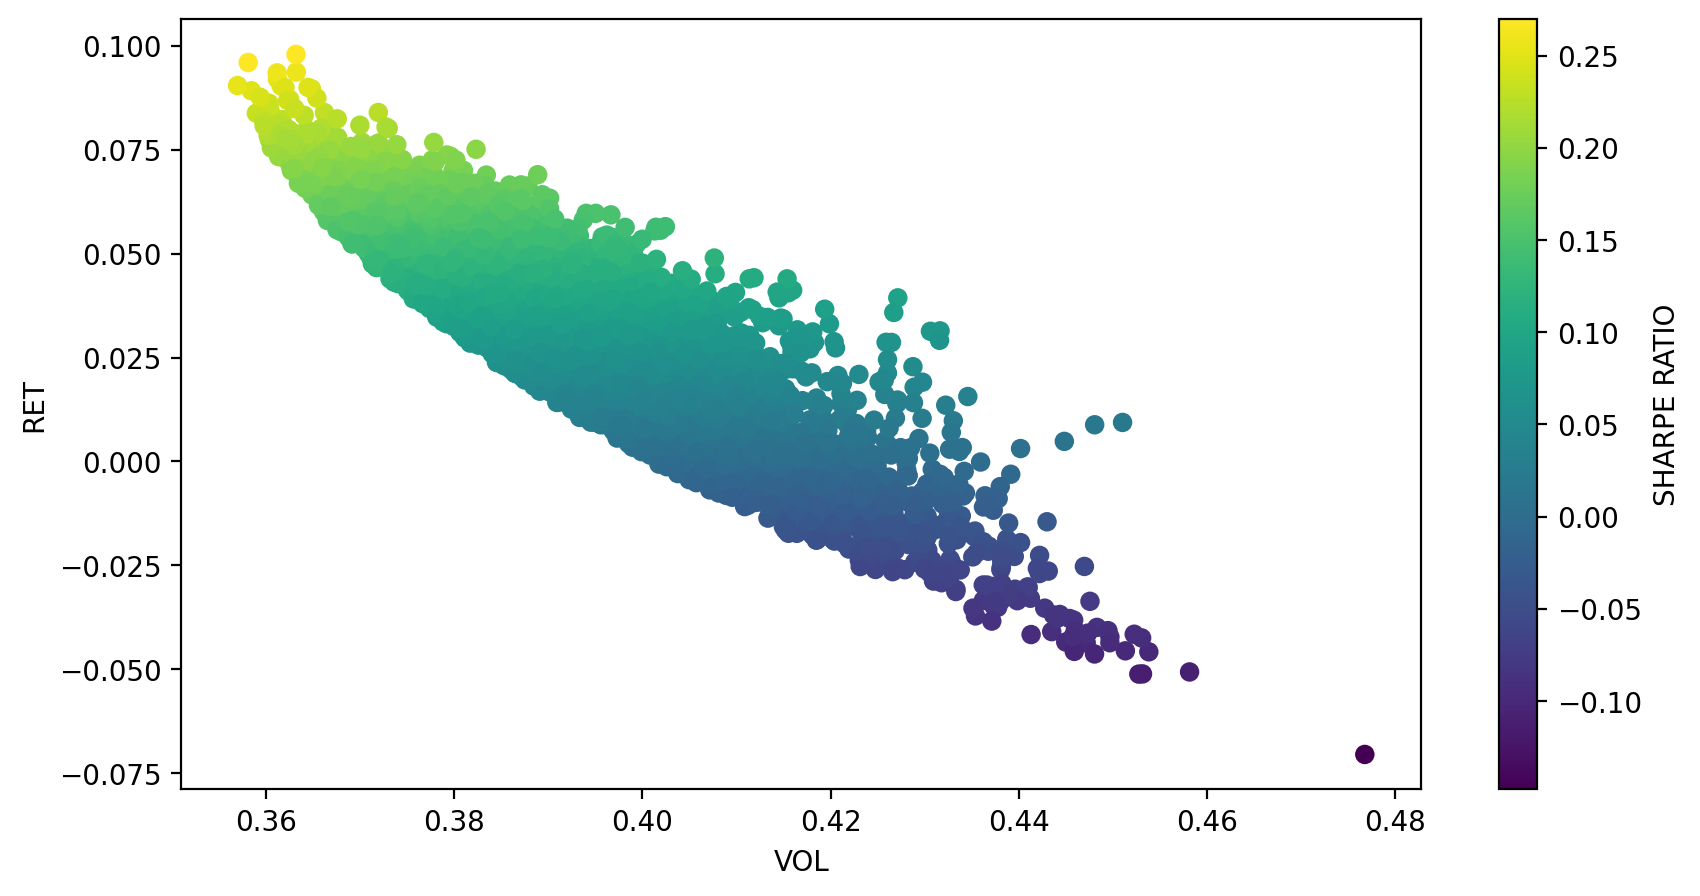

In [10]:
# Creating a scatter plot

plt.figure(dpi=200,figsize=(10,5))

plt.scatter(list_portfolio_vol,list_portfolio_returns, c=mc_sharpe_ratios)

plt.colorbar(label='SHARPE RATIO')

plt.xlabel('VOL')

plt.ylabel('RET')

plt.savefig('Scatterplot.jpg')

In [21]:
# Finding the postion for the optimal portfolio holdings

def max_value():
    am = np.argmax(mc_sharpe_ratios)
    return am 

# mc_sharpe_ratios = np.array(list_portfolio_returns)/np.array(list_portfolio_vol)
# np.argmax is finding the location of the max vlaue in the numpy array.


values = list_weights[max_value()]
print(f'The ideal portfolio index position is {max_value()} and holding percentages are {n}{values}.')


# List_weights[] is a list of the randomy generated percentages we created for the portfolio holdings.
# We are comparing this list to the sharpe ratio. 
# Higher sharpe ratio is considered better.

The ideal portfolio index position is 2118 and holding percentages are 
[0.03023969 0.05932393 0.87199195 0.03844442].
